
## **For split train and test**

In [ ]:
import os

import numpy as np

import shutil

rootdir= '/content/drive/MyDrive/Dataset/gender' #path of the original folder

classes = ['man','woman']

for i in classes:

  os.makedirs(rootdir +'/train/' + i)

  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.2

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

In [ ]:
import tensorflow as tf
input_shape = (150, 150, 3)
batch_size = 16

In [ ]:
import os 
train_path = os.getcwd() + "/drive/MyDrive/Dataset/gender/train"
val_path = os.getcwd() + "/drive/MyDrive/Dataset/gender/val"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
val_datagen = ImageDataGenerator(rescale=1. / 255
                                   )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=input_shape[:-1],
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True)
val_generator = val_datagen.flow_from_directory(val_path,
                                                    target_size=input_shape[:-1],
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True)
num_class = 1

Found 21733 images belonging to 2 classes.
Found 5434 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
        steps_per_epoch=len(train_generator),
        epochs=15,
        validation_data=val_generator,
        validation_steps=len(val_generator),
        shuffle=True, 
        verbose = 1)


Epoch 1/15
1359/1359 [==============================] - 6291s 5s/step - loss: 0.4716 - accuracy: 0.7713 - val_loss: 0.3600 - val_accuracy: 0.8388
Epoch 2/15
1359/1359 [==============================] - 740s 544ms/step - loss: 0.3556 - accuracy: 0.8404 - val_loss: 0.3132 - val_accuracy: 0.8614
Epoch 3/15
1359/1359 [==============================] - 734s 540ms/step - loss: 0.3041 - accuracy: 0.8657 - val_loss: 0.2696 - val_accuracy: 0.8883
Epoch 4/15
1359/1359 [==============================] - 733s 539ms/step - loss: 0.2685 - accuracy: 0.8859 - val_loss: 0.2241 - val_accuracy: 0.9098
Epoch 5/15
1359/1359 [==============================] - 732s 539ms/step - loss: 0.2437 - accuracy: 0.8974 - val_loss: 0.2140 - val_accuracy: 0.9095
Epoch 6/15
1359/1359 [==============================] - 736s 542ms/step - loss: 0.2291 - accuracy: 0.9054 - val_loss: 0.2048 - val_accuracy: 0.9194
Epoch 7/15
1359/1359 [==============================] - 744s 547ms/step - loss: 0.2168 - accuracy: 0.9110 - val_lo

In [ ]:
model_json = model.to_json()
with open("model_sequential.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_sequential.h5")
print("Saved model to disk")

Saved model to disk


Saving 992744_720.jpg to 992744_720.jpg


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Man


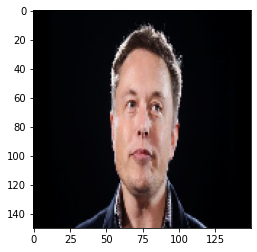

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.imagenet_utils import decode_predictions
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict_classes(images, batch_size=10)
  if(int(predictions[0,0])==0):
    print("Man")
  else:
    print("Woman")